In [1]:
import pandas as pd
from collections import Counter
df = pd.read_csv('scrapeddata.csv')


## Format Data

#### Take away list stuff and turn into an actual python list

In [2]:
rowcounter = 0
themelist = []
themeset = []
# turn strings that I scraped to actual lists 
for row in df.iterrows():
    #iterate over rows 
    selecteddata = df.iloc[rowcounter,:]
    
    #turn into string
    themes = selecteddata['Themes'].strip('[]')
    themes = themes.replace('"', '').split()
    themelist = themelist + themes
    
    #turn into an actual python list
    themeset = list(set(themeset + themelist))
    
    rowcounter += 1

#### Replace - with spaces

In [3]:
theme_srs = pd.Series(themelist).apply(
    lambda x: x.replace(",", "").replace("-", " ").strip()).value_counts()

In [4]:
def combine_themes(theme1, theme2, theme_srs):
    if theme1 in theme2 or theme2 in theme1:
        if theme_srs[theme1] > theme_srs[theme2]:
            return theme1
        else:
            return theme2
    else:
        return None

new_index = []
for i in range(len(theme_srs)):
    #print(i)
    theme1 = theme_srs.index[i]
    for j in range(i):
        theme2 = theme_srs.index[j]
        combined_theme = combine_themes(theme1, theme2, theme_srs)
        if combined_theme is not None:
            new_index.append(combined_theme)
            break
    if len(new_index) < i + 1:
        new_index.append(theme1)


In [5]:
theme_srs.index = new_index

In [6]:
combined_theme_srs = theme_srs.reset_index().groupby("index")[0].sum().sort_values(ascending=False)

In [7]:
# can change number of canonical themes
canonical_themes = combined_theme_srs.iloc[:45].index.drop("race and racism")

In [8]:
# top list of themes - canonical for the whole project
canonical_themes

Index(['family', 'identity', 'love', 'women', 'power', 'language', 'religion',
       'death', 'justice', 'class', 'storytelling', 'nature', 'racism',
       'education', 'survival', 'freedom', 'memory', 'coming of age',
       'morality', 'war', 'fate', 'gender roles', 'growing up', 'time',
       'isolation', 'guilt', 'christianity', 'friendship', 'marriage',
       'community', 'tradition', 'home', 'appearances', 'heroism',
       'fate and free will', 'america', 'work', 'redemption', 'perspective',
       'resistance', 'corruption', 'duality', 'secrecy', 'art'],
      dtype='object', name='index')

In [9]:
print(df.shape)
df.head()

(8202, 3)


,Boolean,Quotes,Themes
0,1,Thus far the history of my life presents nothi...,"[""racism-and-slavery"", ""truth-and-justice"", ""f..."
1,1,"The idea struck me as a prudent one, though I ...","[""racism-and-slavery"", ""truth-and-justice""]"
2,1,Though suspicions of Brown and Hamilton were n...,"[""racism-and-slavery"", ""truth-and-justice""]"
3,1,"So we passed, hand-cuffed and in silence, thro...","[""racism-and-slavery"", ""truth-and-justice""]"
4,1,My cup of sorrow was full to overflowing. Then...,"[""racism-and-slavery"", ""family"", ""christianity""]"


In [10]:
df.loc[0]["Themes"]

'["racism-and-slavery", "truth-and-justice", "family"]'

In [11]:
df2 = pd.DataFrame()
for theme in canonical_themes:
    temp_df = pd.DataFrame()
    temp_df["Quotes"] = df["Quotes"]
    temp_df["theme"] = theme
    temp_df["theme_in_quote"] = df["Themes"].apply(lambda x: theme in x.replace("-", " "))
    df2 = df2.append(temp_df)

In [12]:
# almost ready to be fed into ML algorithms
df2

,Quotes,theme,theme_in_quote
0,Thus far the history of my life presents nothi...,family,True
1,"The idea struck me as a prudent one, though I ...",family,False
2,Though suspicions of Brown and Hamilton were n...,family,False
3,"So we passed, hand-cuffed and in silence, thro...",family,False
4,My cup of sorrow was full to overflowing. Then...,family,True
5,"He would make us hold up our heads, walk brisk...",family,False
6,The influences and associations that had alway...,family,True
7,"He was my master, entitled by law to my flesh ...",family,False
8,"I must toil day after day, endure abuse and ta...",family,False
9,Bent with excessive toil—actually suffering fo...,family,False


In [13]:
true_df = df2[df2["theme_in_quote"] == True]
false_df = df2[df2["theme_in_quote"] == False].sample(frac=0.05)
df3 = pd.DataFrame().append(true_df).append(false_df).reset_index(
    drop=True)

In [14]:
true_df.to_csv('cleaneddata.csv')

In [14]:
canonicallist = list(canonical_themes)

df3["theme_index"] = df3["theme"].apply(lambda x: canonicallist.index(x))

In [15]:
df3

,Quotes,theme,theme_in_quote,theme_index
0,Thus far the history of my life presents nothi...,family,True,0
1,My cup of sorrow was full to overflowing. Then...,family,True,0
2,The influences and associations that had alway...,family,True,0
3,"Well, a favorable day for a person is a fortun...",family,True,0
4,". . . it’s very unusual to me, marrying the br...",family,True,0
5,Marie-Laure twists the chimney of the miniatur...,family,True,0
6,He sweeps her hair back from her ears; he swin...,family,True,0
7,"“It’s not forever, Jutta. Two years, maybe. Ha...",family,True,0
8,“But I wasn’t trying to reach England. Or Pari...,family,True,0
9,"Mostly he misses Jutta: her loyalty, her obsti...",family,True,0


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer = TfidfVectorizer(
    stop_words="english", 
    ngram_range=(1, 1),
    max_df=1.0,
    min_df=0.001
    
)
X = vectorizer.fit_transform(df3["Quotes"])

In [18]:
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
X_df["theme_index"] = df3["theme_index"]

In [19]:
X_df.head()

,000,abandon,abandoned,ability,able,absence,absolute,absolutely,absorbed,abstract,...,yield,yo,york,young,younger,youngest,youth,zero,zeus,theme_index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
X.shape

(29016, 3724)

In [21]:
Y_selected = df3["theme_in_quote"]
Y_selected

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
28986    False
28987    False
28988    False
28989    False
28990    False
28991    False
28992    False
28993    False
28994    False
28995    False
28996    False
28997    False
28998    False
28999    False
29000    False
29001    False
29002    False
29003    False
29004    False
29005    False
29006    False
29007    False
29008    False
29009    False
29010    False
29011    False
29012    False
29013    False
29014    False
29015    False
Name: theme_in_quote, Length: 29016, dtype: bool

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_selected, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

/home/nathanlee/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [25]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [26]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
y_predict = clf.predict(X_test)

In [28]:
score = accuracy_score(y_predict, y_test)
print(score)

0.60390559732665


## Pickle

In [29]:
import pickle

In [30]:
pickle.dump(clf, open('model' + str(score), 'wb'))

In [31]:
pickle.load( open("model0.5998337835030126", 'rb'))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Confusion matrix

In [34]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [35]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

[[5783    0]
 [3793    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


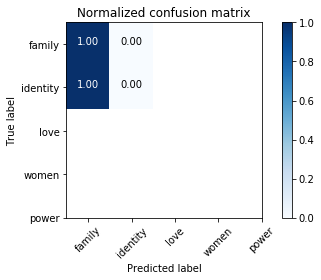

In [36]:
plt.figure()
cannoical_themes = ['family', 'identity', 'love', 'women', 'power', 'language', 'religion',
       'death', 'justice', 'class', 'storytelling', 'nature', 'racism',
       'education', 'survival', 'memory', 'freedom', 'coming of age',
       'morality', 'war', 'fate', 'gender roles', 'growing up', 'time',
       'isolation', 'guilt', 'christianity', 'friendship', 'marriage',
       'community', 'tradition', 'home', 'appearances', 'heroism',
       'fate and free will', 'america', 'work', 'redemption', 'perspective',
       'resistance', 'duality', 'corruption', 'longing', 'secrecy']

print(cnf_matrix)

plot_confusion_matrix(cnf_matrix, classes=cannoical_themes[:5], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [37]:
comparisondf = pd.DataFrame()
comparisondf['y_predict'] = y_predict
comparisondf['y_test'] = y_test
comparisondf


,y_predict,y_test
0,False,NaN
1,False,NaN
2,False,NaN
3,False,True
4,False,NaN
5,False,NaN
6,False,True
7,False,True
8,False,NaN
9,False,NaN
